In [1]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from datetime import datetime
import numpy as np
import os


In [2]:
TRAIN_DATASET_URL = "./adult.data"
TEST_DATASET_URL = "./adult.test"
FEATURES = [
	"age",
	"workclass",
	"fnlwgt",
	"education",
	"education_num",
	"marital_status",
	"occupation",
	"relationship",
	"race",
	"sex",
	"capital_gain",
	"capital_loss",
	"hours_per_week",
	"native_country"
]
LABEL = "income"
COLUMNS = FEATURES + [LABEL]
DTYPE={
	"age": "float32",
	"workclass": "category",
	"fnlwgt": "float32",
	"education": "category",
	"education_num": "float32",
	"marital_status": "category",
	"occupation": "category",
	"relationship": "category",
	"race": "category",
	"sex": "category",
	"capital_gain": "float32",
	"capital_loss": "float32",
	"hours_per_week": "float32",
	"native_country": "category",
	"income": "category"
}
SHUFFLE_SIZE=1024
BATCH_SIZE=50
SEED=1
COLUMNS

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [3]:
tf.random.set_seed(SEED)
random.seed(SEED)

In [4]:
train_data = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), TRAIN_DATASET_URL), names=COLUMNS, dtype=DTYPE, index_col=False, skipinitialspace=True)
train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [5]:
test_data = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), TEST_DATASET_URL), names=COLUMNS, dtype=DTYPE, index_col=False, skiprows=1, skipinitialspace=True)
test_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18.0,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  float32 
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  float32 
 3   education       32561 non-null  category
 4   education_num   32561 non-null  float32 
 5   marital_status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital_gain    32561 non-null  float32 
 11  capital_loss    32561 non-null  float32 
 12  hours_per_week  32561 non-null  float32 
 13  native_country  32561 non-null  category
 14  income          32561 non-null  category
dtypes: category(9), float32(6)
memory usage: 1.0 MB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             16281 non-null  float32 
 1   workclass       16281 non-null  category
 2   fnlwgt          16281 non-null  float32 
 3   education       16281 non-null  category
 4   education_num   16281 non-null  float32 
 5   marital_status  16281 non-null  category
 6   occupation      16281 non-null  category
 7   relationship    16281 non-null  category
 8   race            16281 non-null  category
 9   sex             16281 non-null  category
 10  capital_gain    16281 non-null  float32 
 11  capital_loss    16281 non-null  float32 
 12  hours_per_week  16281 non-null  float32 
 13  native_country  16281 non-null  category
 14  income          16281 non-null  category
dtypes: category(9), float32(6)
memory usage: 528.8 KB


In [8]:
train_data = train_data.dropna()
train_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [9]:
test_data = test_data.dropna()
test_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  float32 
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  float32 
 3   education       32561 non-null  category
 4   education_num   32561 non-null  float32 
 5   marital_status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital_gain    32561 non-null  float32 
 11  capital_loss    32561 non-null  float32 
 12  hours_per_week  32561 non-null  float32 
 13  native_country  32561 non-null  category
 14  income          32561 non-null  category
dtypes: category(9), float32(6)
memory usage: 1.3 MB


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             16281 non-null  float32 
 1   workclass       16281 non-null  category
 2   fnlwgt          16281 non-null  float32 
 3   education       16281 non-null  category
 4   education_num   16281 non-null  float32 
 5   marital_status  16281 non-null  category
 6   occupation      16281 non-null  category
 7   relationship    16281 non-null  category
 8   race            16281 non-null  category
 9   sex             16281 non-null  category
 10  capital_gain    16281 non-null  float32 
 11  capital_loss    16281 non-null  float32 
 12  hours_per_week  16281 non-null  float32 
 13  native_country  16281 non-null  category
 14  income          16281 non-null  category
dtypes: category(9), float32(6)
memory usage: 655.8 KB


In [12]:
# Normalise Features
for feature in FEATURES:
    if train_data[feature].dtype == "float32":
        # min_max_scaler = preprocessing.MinMaxScaler()
        # train_data[[feature]] = min_max_scaler.fit_transform(train_data[[feature]])
        standard_scaler = preprocessing.StandardScaler()
        train_data[[feature]] = standard_scaler.fit_transform(train_data[[feature]])

train_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,1.180890e-08,6.468861e-09,-1.435760e-08,-6.203931e-10,-3.514205e-09,-3.225892e-09
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582206e+00,-1.681631e+00,-3.529656e+00,-1.459205e-01,-2.166595e-01,-3.194030e+00
25%,-7.757679e-01,-6.816911e-01,-4.200596e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02
50%,-1.159546e-01,-1.082193e-01,-3.136003e-02,-1.459205e-01,-2.166595e-01,-3.542945e-02
75%,6.904838e-01,4.478765e-01,7.460392e-01,-1.459205e-01,-2.166595e-01,3.695194e-01
max,3.769612e+00,1.226856e+01,2.300838e+00,1.339458e+01,1.059351e+01,4.742967e+00


In [13]:
# Set categories
for column in COLUMNS:
	if train_data[column].dtype.name == "category":
		labelencoder = preprocessing.LabelEncoder()
		train_data[column] = labelencoder.fit_transform(train_data[column])
		categories=train_data[column].unique()
		train_data[column] = train_data[column].astype(pd.CategoricalDtype(categories=categories))
		print(train_data[column].cat.categories.tolist())

[7, 6, 4, 1, 2, 0, 5, 8, 3]
[9, 11, 1, 12, 6, 15, 7, 8, 5, 10, 14, 4, 0, 3, 13, 2]
[4, 2, 0, 3, 5, 1, 6]
[1, 4, 6, 10, 8, 12, 3, 14, 5, 7, 13, 0, 11, 2, 9]
[1, 0, 5, 3, 4, 2]
[4, 2, 1, 0, 3]
[1, 0]
[39, 5, 23, 19, 0, 26, 35, 33, 16, 9, 2, 11, 20, 30, 22, 31, 4, 1, 37, 7, 25, 36, 14, 32, 6, 8, 10, 13, 3, 24, 41, 29, 28, 34, 38, 12, 27, 40, 17, 21, 18, 15]
[0, 1]


In [14]:
train_data = train_data.astype(dtype=DTYPE)
train_data.dtypes

age                float32
workclass         category
fnlwgt             float32
education         category
education_num      float32
marital_status    category
occupation        category
relationship      category
race              category
sex               category
capital_gain       float32
capital_loss       float32
hours_per_week     float32
native_country    category
income            category
dtype: object

In [15]:
# Normalise Features
for feature in FEATURES:
    if test_data[feature].dtype == "float32":
        # min_max_scaler = preprocessing.MinMaxScaler()
        # test_data[[feature]] = min_max_scaler.fit_transform(test_data[[feature]])
        standard_scaler = preprocessing.StandardScaler()
        test_data[[feature]] = standard_scaler.fit_transform(test_data[[feature]])

test_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,1.628100e+04,1.628100e+04,1.628100e+04,1.628100e+04,1.628100e+04,1.628100e+04
mean,-1.004600e-08,-8.164220e-10,1.620413e-08,-8.592682e-09,-1.116603e-09,-7.351276e-09
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-1.571798e+00,-1.664373e+00,-3.533798e+00,-1.426619e-01,-2.180621e-01,-3.156695e+00
25%,-7.775034e-01,-6.877167e-01,-4.178855e-01,-1.426619e-01,-2.180621e-01,-3.143184e-02
50%,-1.276258e-01,-1.097767e-01,-2.839650e-02,-1.426619e-01,-2.180621e-01,-3.143184e-02
75%,6.666691e-01,4.630361e-01,7.505816e-01,-1.426619e-01,-2.180621e-01,3.692429e-01
max,3.699431e+00,1.230673e+01,2.308538e+00,1.304338e+01,9.134621e+00,4.696530e+00


In [16]:
# Set categories
for column in COLUMNS:
	if test_data[column].dtype.name == "category":
		labelencoder = preprocessing.LabelEncoder()
		test_data[column] = labelencoder.fit_transform(test_data[column])
		categories=train_data[column].unique() # Yes, use the train_data columns to get uniques
		test_data[column] = test_data[column].astype(pd.CategoricalDtype(categories=categories))
		print(test_data[column].cat.categories.tolist())

[7, 6, 4, 1, 2, 0, 5, 8, 3]
[9, 11, 1, 12, 6, 15, 7, 8, 5, 10, 14, 4, 0, 3, 13, 2]
[4, 2, 0, 3, 5, 1, 6]
[1, 4, 6, 10, 8, 12, 3, 14, 5, 7, 13, 0, 11, 2, 9]
[1, 0, 5, 3, 4, 2]
[4, 2, 1, 0, 3]
[1, 0]
[39, 5, 23, 19, 0, 26, 35, 33, 16, 9, 2, 11, 20, 30, 22, 31, 4, 1, 37, 7, 25, 36, 14, 32, 6, 8, 10, 13, 3, 24, 41, 29, 28, 34, 38, 12, 27, 40, 17, 21, 18, 15]
[0, 1]


In [17]:
test_data = test_data.astype(dtype=DTYPE)
test_data.dtypes

age                float32
workclass         category
fnlwgt             float32
education         category
education_num      float32
marital_status    category
occupation        category
relationship      category
race              category
sex               category
capital_gain       float32
capital_loss       float32
hours_per_week     float32
native_country    category
income            category
dtype: object

In [18]:
# Class Balance
train_data[LABEL].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [19]:
# Class Balance
test_data[LABEL].value_counts()

0    12435
1     3846
Name: income, dtype: int64

In [20]:
train_data[LABEL].nunique()

2

In [21]:
test_data[LABEL].nunique()

2

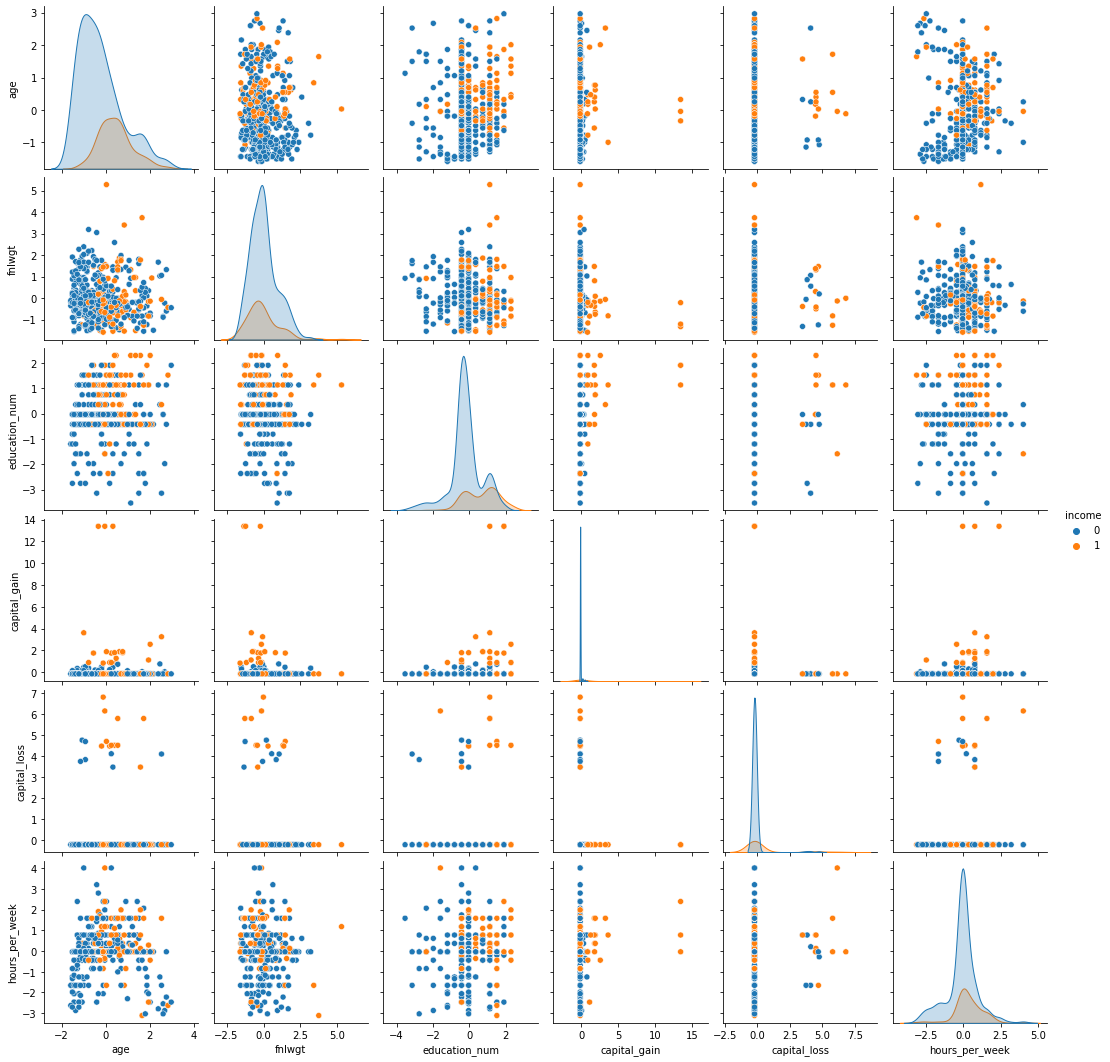

In [22]:
sns.pairplot(train_data.sample(n=500, random_state=1), hue=LABEL)

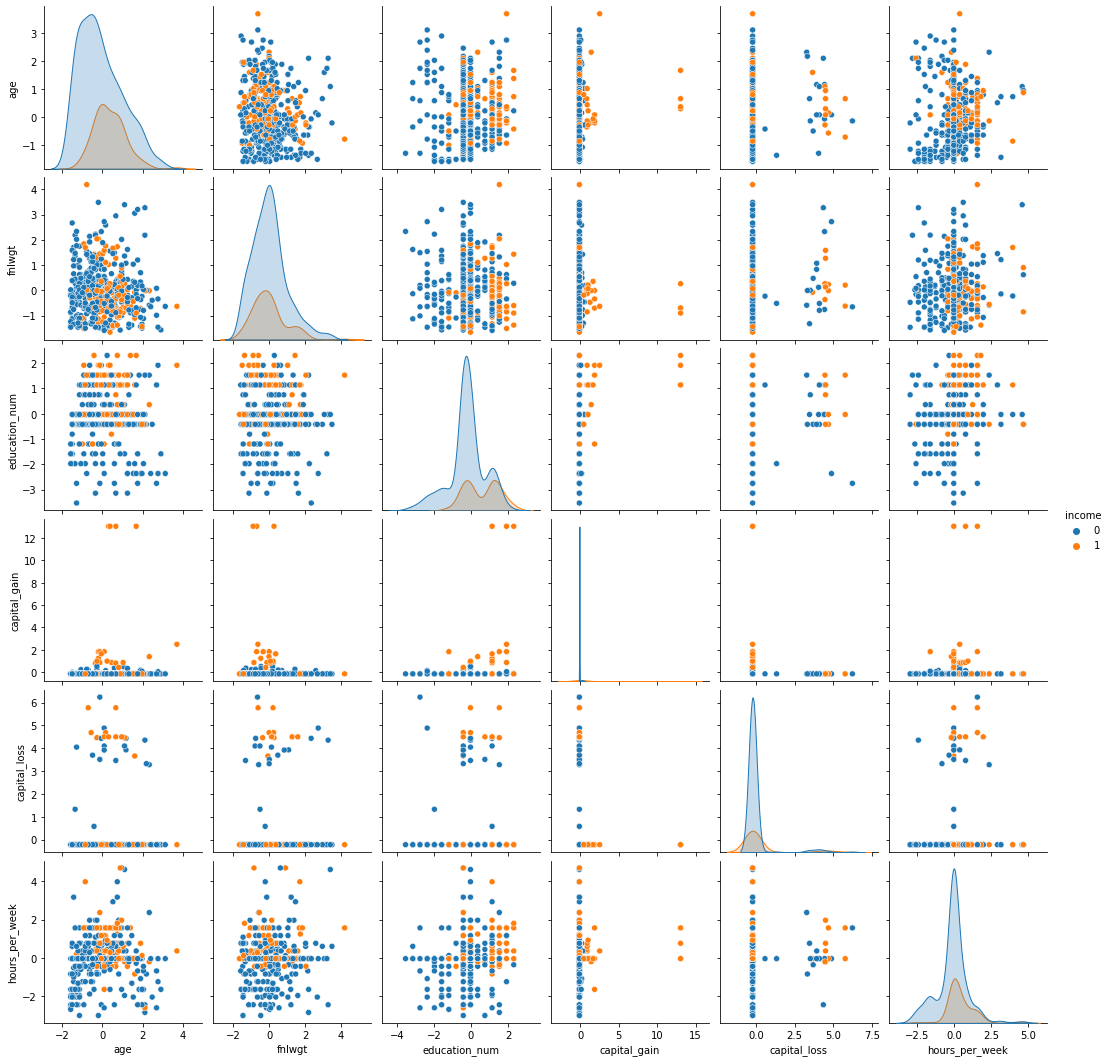

In [23]:
sns.pairplot(test_data.sample(n=500, random_state=1), hue=LABEL)

In [24]:
train_target = train_data.pop(LABEL)
train_target

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: category
Categories (2, int64): [0, 1]

In [25]:
test_target = test_data.pop(LABEL)
test_target

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 16281, dtype: category
Categories (2, int64): [0, 1]

In [26]:
train_data = pd.get_dummies(train_data, dtype="float32")
train_data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_7,workclass_6,workclass_4,workclass_1,...,native_country_28,native_country_34,native_country_38,native_country_12,native_country_27,native_country_40,native_country_17,native_country_21,native_country_18,native_country_15
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
test_data = pd.get_dummies(test_data, dtype="float32")
test_data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_7,workclass_6,workclass_4,workclass_1,...,native_country_28,native_country_34,native_country_38,native_country_12,native_country_27,native_country_40,native_country_17,native_country_21,native_country_18,native_country_15
0,-0.994129,0.353474,-1.196864,-0.142662,-0.218062,-0.031432,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.055417,-0.942391,-0.417886,-0.142662,-0.218062,0.769918,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.777503,1.395450,0.750582,-0.142662,-0.218062,-0.031432,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.377835,-0.275397,-0.028397,0.871091,-0.218062,-0.031432,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.499590,-0.812954,-0.028397,-0.142662,-0.218062,-0.832781,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.016791,0.245794,1.140071,-0.142662,-0.218062,-0.351972,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16277,1.822007,1.248371,-0.417886,-0.142662,-0.218062,-0.031432,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16278,-0.055417,1.755221,1.140071,-0.142662,-0.218062,0.769918,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16279,0.377835,-0.998420,1.140071,0.576644,-0.218062,-0.031432,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Set training dataset
train = tf.data.Dataset.from_tensor_slices(
		(train_data.values, train_target.values))

# Set testing dataset
test = tf.data.Dataset.from_tensor_slices(
		(test_data.values, test_target.values))
